## Flourescence Line Height

### importing modules

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import time
from datetime import datetime as dt
from matplotlib import rcParams
%matplotlib inline

### importing data

In [3]:
flh_df = pd.read_csv("https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMH1cflh8day.csv?cflh%5B(2004-02-22T00:00:00Z):1:(2012-02-22T00:00:00Z)%5D%5B(52.35416):1:(52.02083)%5D%5B(-175.7708):1:(-175.2708)%5D")

In [4]:
flh_df

,time,latitude,longitude,cflh
0,UTC,degrees_north,degrees_east,W m-2 um-1 sr-1
1,2004-02-22T00:00:00Z,52.354164,-175.77083,0.034418
2,2004-02-22T00:00:00Z,52.354164,-175.72917,0.048145
3,2004-02-22T00:00:00Z,52.354164,-175.6875,0.048145
4,2004-02-22T00:00:00Z,52.354164,-175.64583,0.058061
...,...,...,...,...
43169,2012-02-22T00:00:00Z,52.020832,-175.4375,0.091815
43170,2012-02-22T00:00:00Z,52.020832,-175.39583,NaN
43171,2012-02-22T00:00:00Z,52.020832,-175.35417,NaN
43172,2012-02-22T00:00:00Z,52.020832,-175.3125,NaN


### evaluating NaNs

In [7]:
print(f"Out of {len(flh_df.loc[1:])} records {len(flh_df.loc[1:][flh_df.loc[1:].cflh.isna()])/(len(flh_df)-1)*100}% records is NaN")

Out of 43173 records 86.19275936349106% records is NaN


### Time Series analysis 
Analysing trend around +-9 months.

In [12]:
def stamptodate(x):
    return time.mktime(dt.strptime(x[:10], "%Y-%m-%d").timetuple())

In [22]:
rcParams['figure.figsize'] = (15,10)

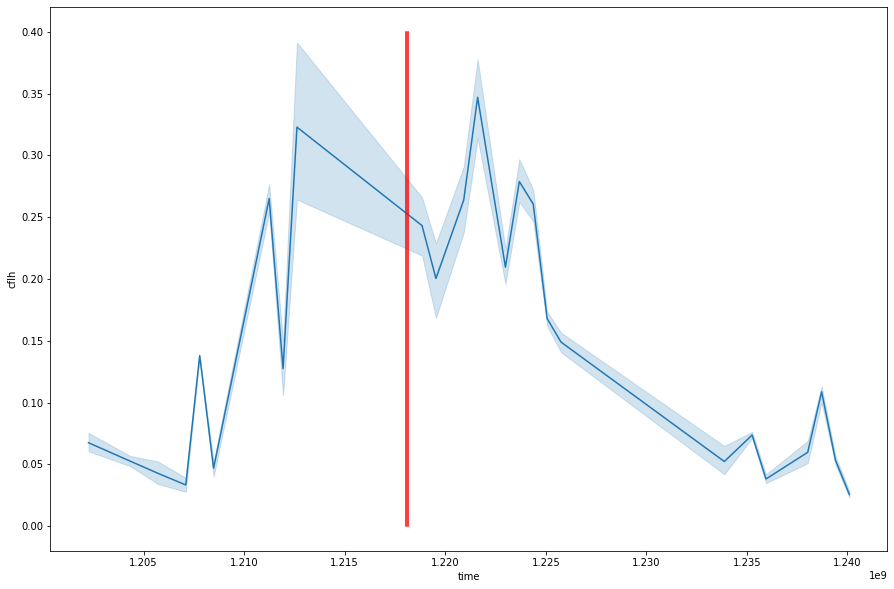

In [24]:
sns.lineplot(x = flh_df.loc[1:][flh_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270 *86400, 1218067200.0 + 270*86400)].time.apply(stamptodate),
             y = flh_df.loc[1:][flh_df.loc[1:].time.apply(stamptodate).between(1218067200.0 - 270*86400, 1218067200.0 + 270*86400)].cflh.astype(float),
            )
plt.plot([1218067200.0]*2, [0, 0.4], color="red")
plt.plot([1218067200.0+86400]*2, [0, 0.4], color="red")
plt.show()

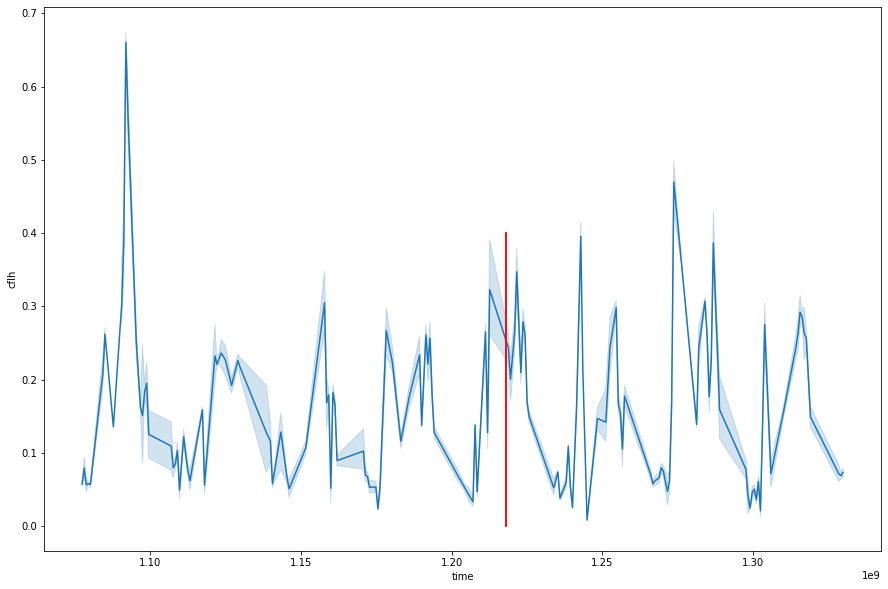

In [26]:
sns.lineplot(x = flh_df.loc[1:].time.apply(stamptodate), y = flh_df.loc[1:].cflh.astype(float))
plt.plot([1218067200.0]*2, [0, 0.4], color="red")
plt.plot([1218067200.0+86400]*2, [0, 0.4], color="red")
plt.show()